In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
len(coordinates)

1500

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | galle
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | tres picos
Processing Record 7 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 1 | jiroft
City not found. Skipping...
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | nefteyugansk
Processing Record 12 of Set 1 | valley
Processing Record 13 of Set 1 | kutum
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | asyut
Processing Record 19 of Set 1 | kijang
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | m

Processing Record 35 of Set 4 | mayskiy
Processing Record 36 of Set 4 | mikhaylovka
Processing Record 37 of Set 4 | nayoro
Processing Record 38 of Set 4 | waingapu
Processing Record 39 of Set 4 | atuona
Processing Record 40 of Set 4 | cabrero
Processing Record 41 of Set 4 | itaueira
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | broome
Processing Record 44 of Set 4 | ranong
Processing Record 45 of Set 4 | kondinskoye
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | chegdomyn
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 50 of Set 4 | athabasca
Processing Record 1 of Set 5 | kamienna gora
Processing Record 2 of Set 5 | carmen del parana
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | belmonte
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | klaksvik
Processing Record 7 of Set 5 | galveston
Proces

Processing Record 22 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 23 of Set 8 | bam
Processing Record 24 of Set 8 | bletchley
Processing Record 25 of Set 8 | udachnyy
Processing Record 26 of Set 8 | bulungu
Processing Record 27 of Set 8 | nishihara
Processing Record 28 of Set 8 | cavalcante
Processing Record 29 of Set 8 | kaya
Processing Record 30 of Set 8 | madang
Processing Record 31 of Set 8 | sao filipe
Processing Record 32 of Set 8 | basugaon
Processing Record 33 of Set 8 | ankaran
Processing Record 34 of Set 8 | oranjemund
Processing Record 35 of Set 8 | moroni
Processing Record 36 of Set 8 | port hawkesbury
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | buta
Processing Record 39 of Set 8 | am timan
Processing Record 40 of Set 8 | kenai
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | hella
Processing Record 43 of Set 8 | ixtapa
Processing Record 44 of Set 8 | minsk
Processing Record 45 of Set 8 | ca

City not found. Skipping...
Processing Record 13 of Set 12 | mozarlandia
Processing Record 14 of Set 12 | tautira
Processing Record 15 of Set 12 | kendari
Processing Record 16 of Set 12 | toulepleu
City not found. Skipping...
Processing Record 17 of Set 12 | podgornoye
Processing Record 18 of Set 12 | chinhoyi
Processing Record 19 of Set 12 | prince george
Processing Record 20 of Set 12 | port blair
Processing Record 21 of Set 12 | sumbe
Processing Record 22 of Set 12 | jining
Processing Record 23 of Set 12 | barbar
City not found. Skipping...
Processing Record 24 of Set 12 | egvekinot
Processing Record 25 of Set 12 | biltine
Processing Record 26 of Set 12 | snasa
Processing Record 27 of Set 12 | aitape
Processing Record 28 of Set 12 | hukuntsi
Processing Record 29 of Set 12 | vanimo
Processing Record 30 of Set 12 | mecca
Processing Record 31 of Set 12 | tanout
Processing Record 32 of Set 12 | alofi
Processing Record 33 of Set 12 | mulege
Processing Record 34 of Set 12 | shimoda
Proces

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Galle,6.0367,80.2170,77.41,80,97,0.96,LK,2022-02-06 18:47:48
1,Cape Town,-33.9258,18.4232,69.10,75,20,5.75,ZA,2022-02-06 18:47:48
2,Constitucion,-35.3333,-72.4167,71.74,56,13,9.75,CL,2022-02-06 18:47:49
3,Albany,42.6001,-73.9662,27.82,49,13,3.00,US,2022-02-06 18:44:54
4,Kavieng,-2.5744,150.7967,81.16,77,82,3.47,PG,2022-02-06 18:46:26
5,Tres Picos,15.8667,-93.5333,88.03,39,11,2.66,MX,2022-02-06 18:47:50
6,Nikolskoye,59.7035,30.7861,35.87,94,100,12.28,RU,2022-02-06 18:47:50
7,Georgetown,5.4112,100.3354,78.73,92,40,0.00,MY,2022-02-06 18:47:51
8,Nefteyugansk,61.0998,72.6035,-1.86,98,35,8.50,RU,2022-02-06 18:47:51
9,Valley,45.1277,-116.1262,11.01,85,9,3.76,US,2022-02-06 18:47:52


In [10]:
city_data_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[city_data_order]

In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Galle,LK,2022-02-06 18:47:48,6.0367,80.2170,77.41,80,97,0.96
1,Cape Town,ZA,2022-02-06 18:47:48,-33.9258,18.4232,69.10,75,20,5.75
2,Constitucion,CL,2022-02-06 18:47:49,-35.3333,-72.4167,71.74,56,13,9.75
3,Albany,US,2022-02-06 18:44:54,42.6001,-73.9662,27.82,49,13,3.00
4,Kavieng,PG,2022-02-06 18:46:26,-2.5744,150.7967,81.16,77,82,3.47
5,Tres Picos,MX,2022-02-06 18:47:50,15.8667,-93.5333,88.03,39,11,2.66
6,Nikolskoye,RU,2022-02-06 18:47:50,59.7035,30.7861,35.87,94,100,12.28
7,Georgetown,MY,2022-02-06 18:47:51,5.4112,100.3354,78.73,92,40,0.00
8,Nefteyugansk,RU,2022-02-06 18:47:51,61.0998,72.6035,-1.86,98,35,8.50
9,Valley,US,2022-02-06 18:47:52,45.1277,-116.1262,11.01,85,9,3.76


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

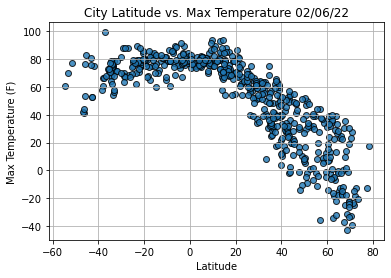

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show

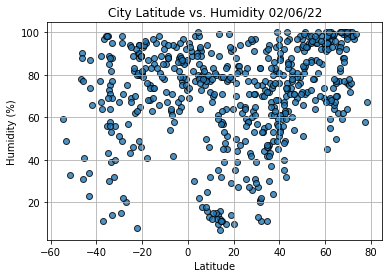

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

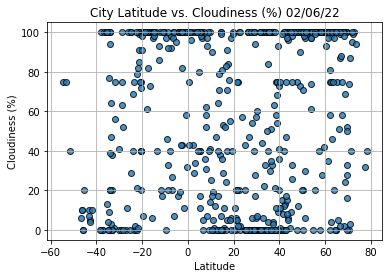

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

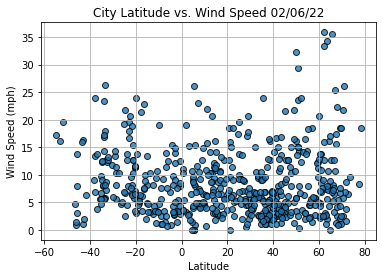

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-02-06 18:47:02
Lat                         -54.8
Lng                         -68.3
Max Temp                    60.46
Humidity                       59
Cloudiness                     75
Wind Speed                  17.27
Name: 13, dtype: object

In [21]:
# We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, 
#we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. 
#Executing this code will return either "True" or "False" for all the rows that meet these criteria.
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
557     True
558     True
559     True
560     True
561     True
Name: Lat, Length: 562, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Galle,LK,2022-02-06 18:47:48,6.0367,80.2170,77.41,80,97,0.96
3,Albany,US,2022-02-06 18:44:54,42.6001,-73.9662,27.82,49,13,3.00
5,Tres Picos,MX,2022-02-06 18:47:50,15.8667,-93.5333,88.03,39,11,2.66
6,Nikolskoye,RU,2022-02-06 18:47:50,59.7035,30.7861,35.87,94,100,12.28
7,Georgetown,MY,2022-02-06 18:47:51,5.4112,100.3354,78.73,92,40,0.00


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

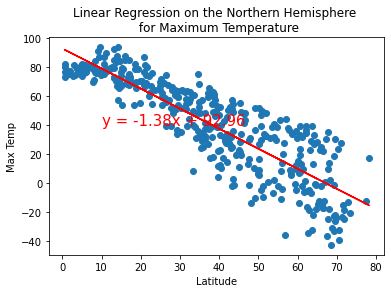

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

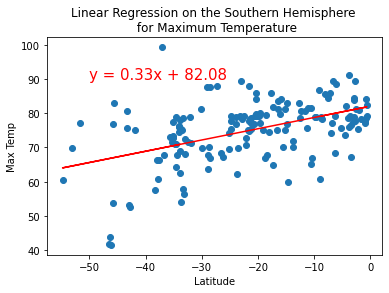

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

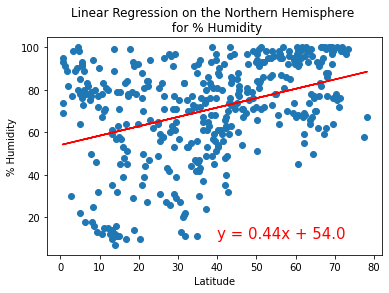

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

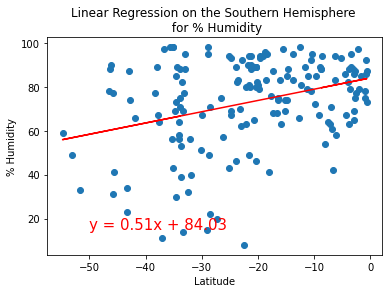

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

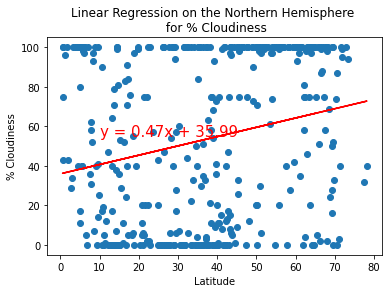

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

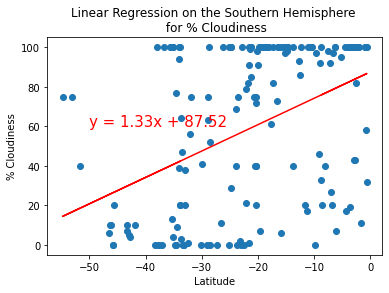

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

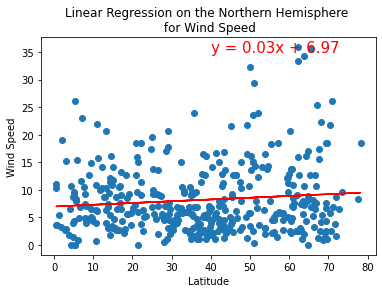

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

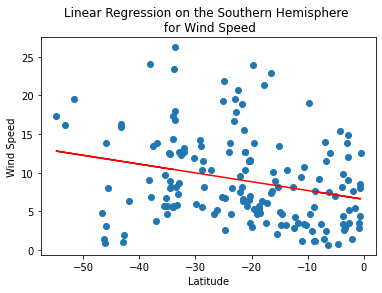

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))